In [ ]:
import os
import tensorflow as tf

# Download + auto-extract dataset
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file(
    'cats_and_dogs_filtered.zip', origin=_URL, extract=True
)

# Base directory after auto extraction
base_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

print("✅ Dataset ready!")
print("Train directory:", train_dir)
print("Validation directory:", validation_dir)



✅ Dataset ready!
Train directory: /root/.keras/datasets/cats_and_dogs_filtered/train
Validation directory: /root/.keras/datasets/cats_and_dogs_filtered/validation


In [ ]:
import glob
print(glob.glob("/root/.keras/datasets/*"))


['/root/.keras/datasets/cats_and_dogs.zip', '/root/.keras/datasets/cats_and_dogs_extracted', '/root/.keras/datasets/cats_and_dogs_filtered_extracted', '/root/.keras/datasets/cats_and_dogs_filtered.zip']


✅ Dataset ready!
Train directory exists: True
Validation directory exists: True
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1581s 25s/step - accuracy: 0.6997 - loss: 0.5491 - val_accuracy: 0.8890 - val_loss: 0.2620
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1552s 25s/step - accuracy: 0.9186 - loss: 0.2317 - val_accuracy: 0.9030 - val_loss: 0.2266
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1582s 25s/step - accuracy: 0.9377 - loss: 0.1687 - val_accuracy: 0.8960 - val_loss: 0.2555
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1566s 25s/step - accuracy: 0.9601 - loss: 0.1227 - val_accuracy: 0.9170 - val_loss: 0.2084
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1533s 24s/step - accuracy: 0.9656 - loss: 0.1024 - val_accuracy: 0.9200 - val_loss: 0.2057
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 480s 8s/step - accuracy: 0.5074 - loss: 0.8023 - val_accuracy: 0.5350 - val_loss: 0.6829
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 481s 8s/step - accuracy: 0.5093 - loss: 0.7273 - val_accuracy: 0.6100 - val_loss: 0.6675
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 518s 8s/step - accur

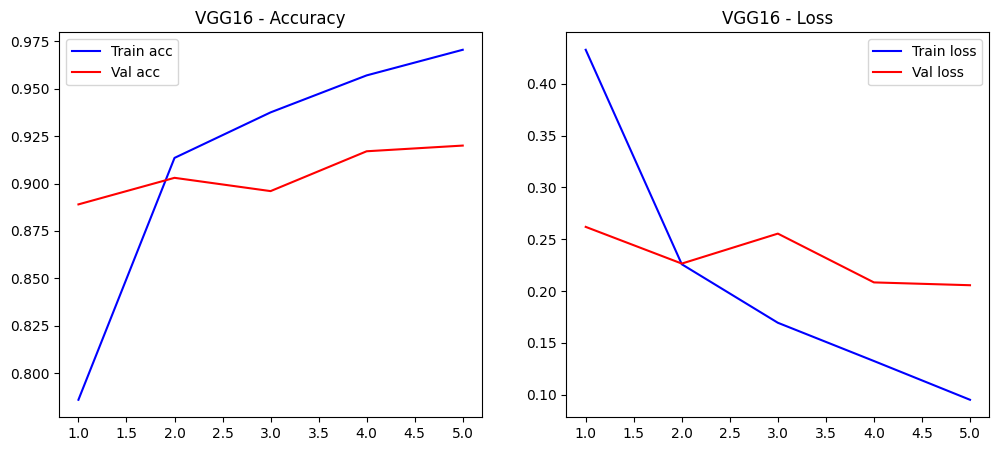

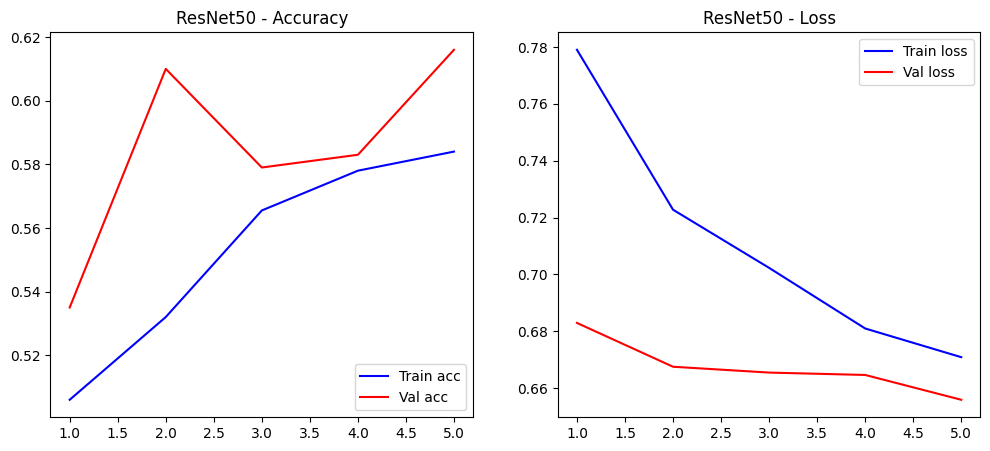

✅ Training completed & models saved!


In [7]:
# -------------------------------
# 1. Import Libraries
# -------------------------------
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models, optimizers

# -------------------------------
# 2. Download & Extract Dataset
# -------------------------------
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url, extract=True)

# Extract again into a custom folder (to be safe)
extract_dir = os.path.join(os.path.dirname(dataset_path), "cats_and_dogs_filtered_extracted")
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

# ✅ Correct dataset path
base_dir = os.path.join(extract_dir, "cats_and_dogs_filtered")

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

print("✅ Dataset ready!")
print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(validation_dir))

# -------------------------------
# 3. Data Preprocessing
# -------------------------------
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# -------------------------------
# 4. Build & Train VGG16 Model
# -------------------------------
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model_vgg = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

vgg_base.trainable = False
model_vgg.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_vgg = model_vgg.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

# -------------------------------
# 5. Build & Train ResNet50 Model
# -------------------------------
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model_resnet = models.Sequential([
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

resnet_base.trainable = False
model_resnet.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

history_resnet = model_resnet.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

# -------------------------------
# 6. Plot Training Curves
# -------------------------------
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Train acc')
    plt.plot(epochs, val_acc, 'r', label='Val acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Train loss')
    plt.plot(epochs, val_loss, 'r', label='Val loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

plot_history(history_vgg, "VGG16")
plot_history(history_resnet, "ResNet50")

# -------------------------------
# 7. Save Models
# -------------------------------
model_vgg.save("cats_dogs_vgg16.h5")
model_resnet.save("cats_dogs_resnet50.h5")

print("✅ Training completed & models saved!")


In [8]:
# -------------------------------
# 1. True Fine-Tuning for VGG16
# -------------------------------
# Unfreeze last few convolutional layers
vgg_base.trainable = True
for layer in vgg_base.layers[:-10]:  # Freeze all layers except last 10
    layer.trainable = False

# Compile with lower learning rate for fine-tuning
model_vgg.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train fine-tuned VGG16
history_vgg_finetune = model_vgg.fit(
    train_generator,
    epochs=3,  # Can increase if desired
    validation_data=validation_generator
)

# Evaluate on validation/test set
vgg_eval = model_vgg.evaluate(validation_generator)
print("VGG16 Fine-Tuned Evaluation: Loss = {:.4f}, Accuracy = {:.4f}".format(vgg_eval[0], vgg_eval[1]))

# -------------------------------
# 2. True Fine-Tuning for ResNet50
# -------------------------------
resnet_base.trainable = True
for layer in resnet_base.layers[:-10]:  # Freeze all layers except last 10
    layer.trainable = False

# Compile with lower learning rate
model_resnet.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train fine-tuned ResNet50
history_resnet_finetune = model_resnet.fit(
    train_generator,
    epochs=3,  # Can increase if desired
    validation_data=validation_generator
)

# Evaluate on validation/test set
resnet_eval = model_resnet.evaluate(validation_generator)
print("ResNet50 Fine-Tuned Evaluation: Loss = {:.4f}, Accuracy = {:.4f}".format(resnet_eval[0], resnet_eval[1]))

# -------------------------------
# 3. Save Fine-Tuned Models
# -------------------------------
model_vgg.save("VGG16_dogs_vs_cats_finetuned.h5")
model_resnet.save("ResNet50_dogs_vs_cats_finetuned.h5")
print("✅ Fine-tuned models saved successfully!")


Epoch 1/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 2718s 43s/step - accuracy: 0.9730 - loss: 0.0727 - val_accuracy: 0.9370 - val_loss: 0.1540
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 2763s 44s/step - accuracy: 0.9941 - loss: 0.0208 - val_accuracy: 0.9520 - val_loss: 0.1426
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 2782s 44s/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 0.9550 - val_loss: 0.1376
32/32 ━━━━━━━━━━━━━━━━━━━━ 522s 16s/step - accuracy: 0.9554 - loss: 0.1444
VGG16 Fine-Tuned Evaluation: Loss = 0.1376, Accuracy = 0.9550
Epoch 1/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 545s 8s/step - accuracy: 0.5631 - loss: 0.7893 - val_accuracy: 0.5920 - val_loss: 0.6609
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 530s 8s/step - accuracy: 0.6255 - loss: 0.6426 - val_accuracy: 0.6220 - val_loss: 0.6535
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 529s 8s/step - accuracy: 0.6845 - loss: 0.6056 - val_accuracy: 0.6360 - val_loss: 0.6483
32/32 ━━━━━━━━━━━━━━━━━━━━ 160s 5s/step - accuracy: 0.6487 - loss: 0.6442


ResNet50 Fine-Tuned Evaluation: Loss = 0.6483, Accuracy = 0.6360


✅ Fine-tuned models saved successfully!
